<h1>Malariy Prediction Model</h1>
Made by help of the kaggle dataset and kaggle
</br>Dataset link: https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria

In [1]:
from PIL import Image
import numpy as np
import os

In [2]:
image_class_0 = os.listdir("/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized")
image_class_1 = os.listdir("/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected")

In [3]:
class_0 = []
class_1 = []
_0 = "/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized"
_1 = "/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected"
for file_name in image_class_0:
    file_path = os.path.join(_0 , file_name)
    if file_name.endswith((".jpg", ".jpeg", ".png")):
        try:
            img = Image.open(file_path)
            class_0.append(img)
        except (IOError, OSError):
            print()
for file_name in image_class_1:
    file_path = os.path.join(_1 , file_name)
    if file_name.endswith((".jpg", ".jpeg", ".png")):
        try:
            img = Image.open(file_path)
            class_1.append(img)
        except (IOError, OSError):
            print()

In [4]:
class_0 = np.array(class_0 , dtype = object)
class_1 = np.array(class_1 , dtype = object)

/tmp/ipykernel_32/1130657295.py:1: FutureWarning: The input object of type 'PngImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'PngImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  class_0 = np.array(class_0 , dtype = object)
/tmp/ipykernel_32/1130657295.py:2: FutureWarning: The input object of type 'PngImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'PngImageFile', or assign to an empty array creat

In [5]:
class_0_labels = np.zeros((class_0.shape[0], 1))
class_1_labels = np.ones((class_1.shape[0], 1))

In [6]:
x = np.concatenate((class_0, class_1), axis=0)
y = np.concatenate((class_0_labels, class_1_labels), axis=0)

In [7]:
image_size = (150, 150)
x_resized = [np.array(img.copy().resize(image_size)) for img in x]
x = np.array(x_resized, dtype=np.float32) / 255.0

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1, random_state=42)

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [10]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [11]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [12]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
776/776 [==============================] - 445s 572ms/step - loss: 0.3851 - accuracy: 0.8269 - val_loss: 0.1706 - val_accuracy: 0.9343
Epoch 2/20
776/776 [==============================] - 444s 573ms/step - loss: 0.1683 - accuracy: 0.9433 - val_loss: 0.1462 - val_accuracy: 0.9561
Epoch 3/20
776/776 [==============================] - 445s 574ms/step - loss: 0.1473 - accuracy: 0.9519 - val_loss: 0.1386 - val_accuracy: 0.9590
Epoch 4/20
776/776 [==============================] - 444s 572ms/step - loss: 0.1252 - accuracy: 0.9573 - val_loss: 0.1392 - val_accuracy: 0.9546
Epoch 5/20
776/776 [==============================] - 451s 581ms/step - loss: 0.1107 - accuracy: 0.9618 - val_loss: 0.1274 - val_accuracy: 0.9586
Epoch 6/20
776/776 [==============================] - 446s 574ms/step - loss: 0.0951 - accuracy: 0.9656 - val_loss: 0.1360 - val_accuracy: 0.9590
Epoch 7/20
776/776 [==============================] - 443s 570ms/step - loss: 0.0825 - accuracy: 0.9708 - val_loss: 0.1632 -

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

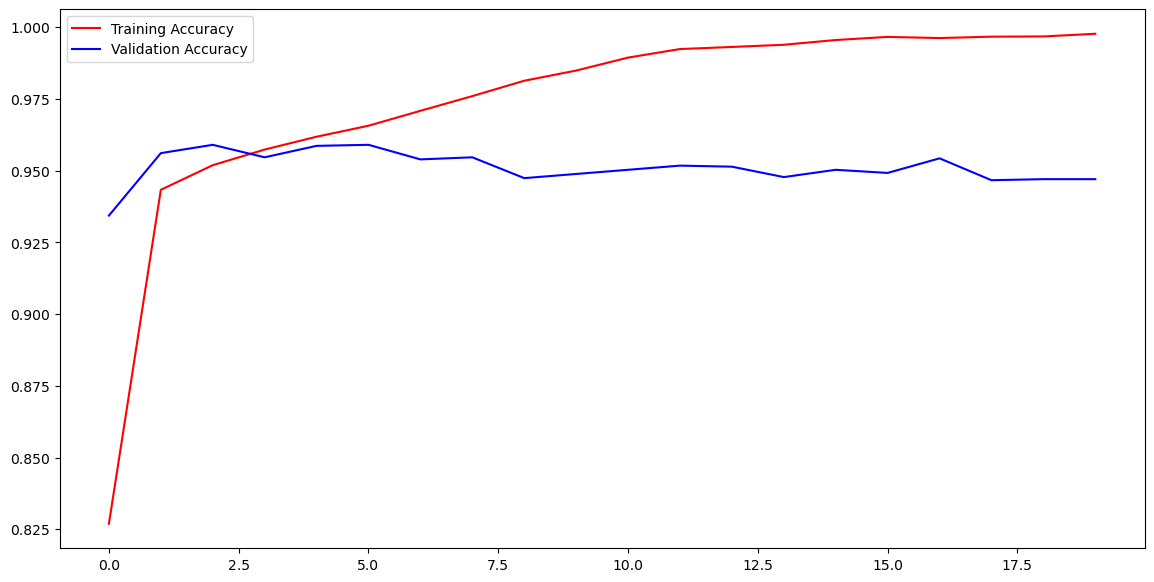

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

# Saving the model
model.save("kaggle/working/malariaModel.h5")

fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

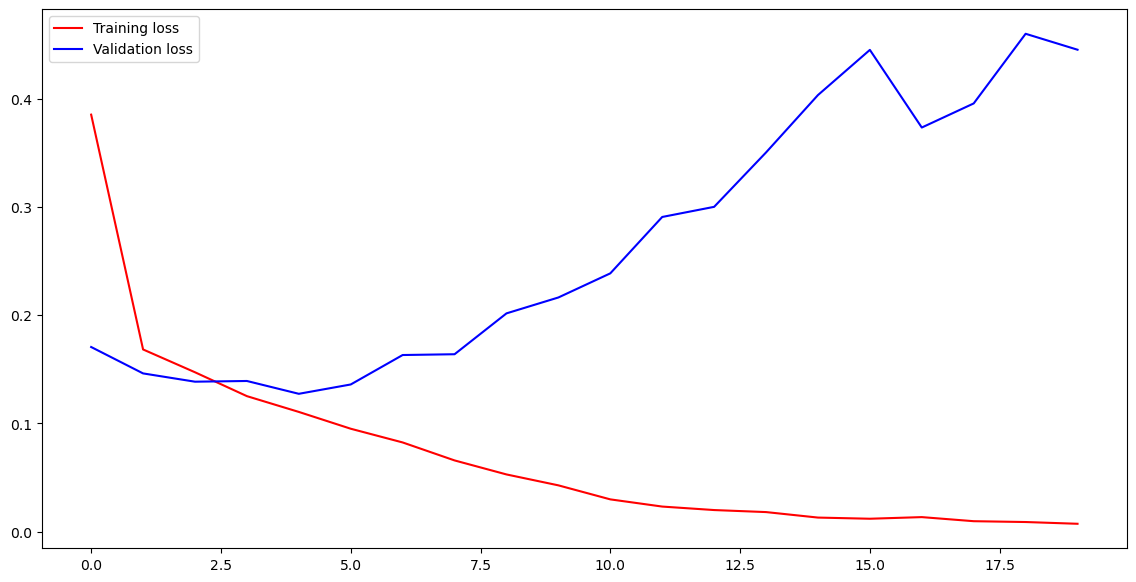

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()